# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [43]:

df_descr = pd.read_csv('./Projects/python/sfml/hw_02/data/otp_description.csv', sep='\t', encoding='utf8')

In [44]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [45]:
df_train = pd.read_csv('./Projects/python/sfml/hw_02/data/otp_train.csv', sep='\t', encoding='utf8')

In [46]:
df_train.shape

(15223, 52)

In [47]:
df_test = pd.read_csv('./Projects/python/sfml/hw_02/data/otp_test.csv', sep='\t', encoding='utf8')

In [48]:
df_test.shape

(14910, 52)

In [49]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [50]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'


In [51]:
df = df_test.append(df_train).reset_index(drop=True)
df.head().T

,0,1,2,3,4
AGREEMENT_RK,59909969,59910420,59911223,59911322,59911438
TARGET,0,0,0,0,0
AGE,30,48,35,22,27
SOCSTATUS_WORK_FL,1,0,1,1,1
SOCSTATUS_PENS_FL,0,1,0,0,0
GENDER,1,1,0,0,1
CHILD_TOTAL,1,0,1,0,2
DEPENDANTS,1,0,0,0,2
EDUCATION,Среднее специальное,Среднее,Среднее,Среднее,Высшее
MARITAL_STATUS,Не состоял в браке,Состою в браке,Не состоял в браке,Не состоял в браке,Состою в браке


In [52]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [54]:

def viewObjectsFormTable(data_frame):    
    for i in data_frame.columns: # перебираем все столбцы
        if str(data_frame[i].dtype) == 'object': # если тип столбца - object
            print('='*10)
            print(i) # выводим название столбца
            print(set(data_frame[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
            print('\n') # выводим пустую строку

viewObjectsFormTable(df_train)

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Маркетинг', 'Здравоохранение', 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Информационные услуги', 'Страхование', 'Строительство', 'Энергетика', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Торговля', 'Государственная служба', 'Подбор персонала', 'Информационные технологии', 'Металлургия/Промышленность/Машиностроение', 'Юридические услуги/нотариальные услуги', 'Образование', 'Недвижимость', 'Туризм', 'Другие сферы', 'Развлечения/Искусство', 'Нефтегазовая промышленность', 'Салоны красоты и здоровья', 'Банк/Финансы', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [55]:
#df[col_name].map(lambda x: x.replace(',', '.')).astype('float')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

DecisionTreeClassifier показывает более приемлемые результаты, чем остальные два

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Для строковых значений стоит указать пустую строку или прочерк, как символ не указанного значения

Для WORK_TIME  возможно стоит взять медиану, хотя возможно 0 будет более релевантным, для более пессимистичной оценки по этому признаку, в случае если значение не указали

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категоральных признаков много, в основном это все строковые. Необходимо one-hot кодирование функцией pd.get_dammies()



#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [56]:
def preproc_data(df_input):
    df_output = df_input.copy()  
    
    ## Your Code Here
    
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    col_names = ['PERSONAL_INCOME', 'LOAN_MAX_DLQ_AMT', 'LOAN_AVG_DLQ_AMT', 'FST_PAYMENT', 'CREDIT']
    for col_name in col_names:
        df_output[col_name] = df_output[col_name].map(lambda x: x.replace(',', '.')).astype('float')
    
    object_cols = set()    
   
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)
    
   
    for i in df_output.columns: 
        if str(df_output[i].dtype) == 'object':       
            df_output.fillna('', inplace=True)  
            object_cols.add(i)
    
    
    df_output = pd.get_dummies(df_output, columns=list(object_cols.difference({'sample'})))
    
    return df_output

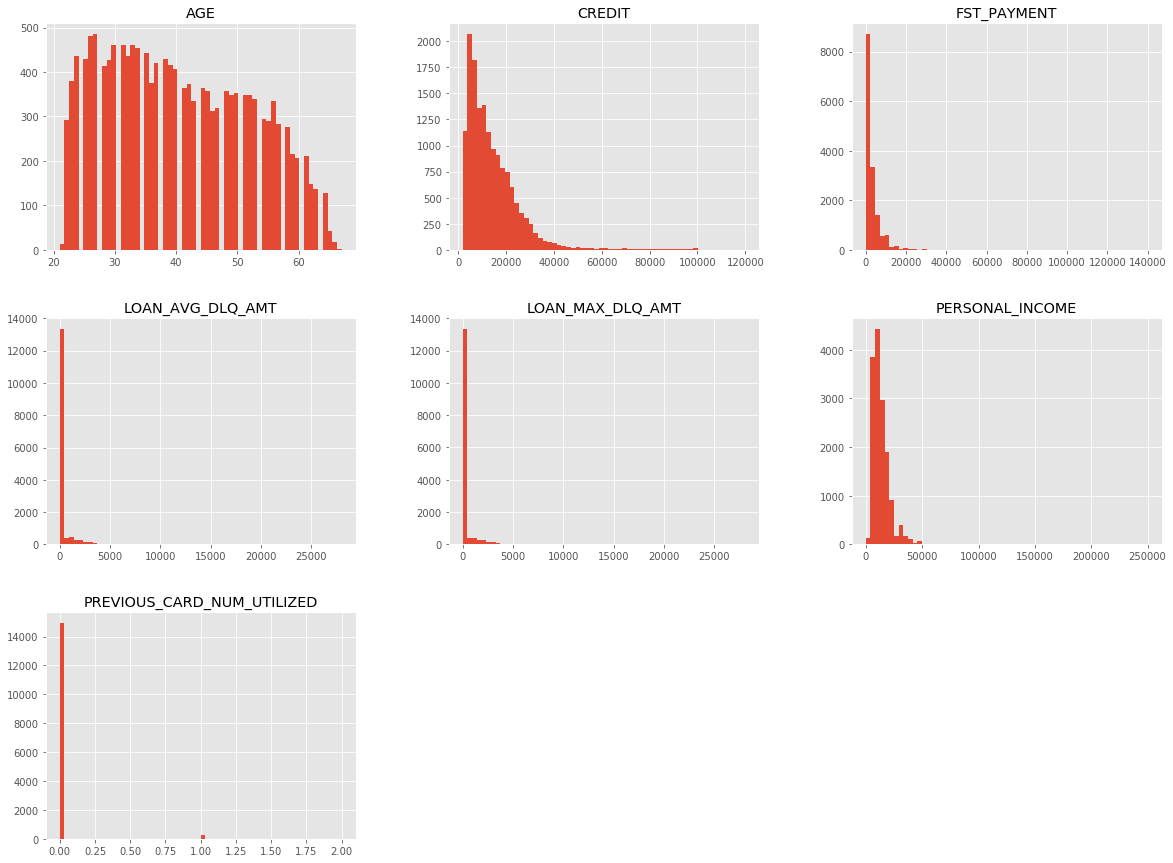

In [57]:
df_preproc = df.pipe(preproc_data)#self передастся в функцию preproc_data

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

%matplotlib inline
import matplotlib.pyplot as plt
df_train_preproc[['AGE', 'PERSONAL_INCOME', 'LOAN_MAX_DLQ_AMT', 'LOAN_AVG_DLQ_AMT', 'FST_PAYMENT', 'CREDIT', 'PREVIOUS_CARD_NUM_UTILIZED']].hist(bins=60, figsize=(20,15))
plt.show()


In [58]:
df['PREVIOUS_CARD_NUM_UTILIZED'].unique()

array([nan,  1.,  2.])

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [59]:
#TARGET - целевая переменная

y_train = df_train_preproc.TARGET
y_test = df_test_preproc.TARGET

x_train = df_train_preproc.drop(["TARGET"], axis=1)
x_test =  df_test_preproc.drop(["TARGET"], axis=1)


print("Общая длина выборки ", len(y_train))
#Явный дизбаланс данных!!! 
#Отрицательных ответов намного больше положительных, как следствие поменяем 1 на 0 и наоборот,
#чтобы оценить предсказывание отрицательных
print("Количество положительных результатов", y_train.sum())



Общая длина выборки  15223
Количество положительных результатов 1812


#### Задание 5. Обучение и оценка качества разных моделей

In [60]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here


In [61]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

## Your Code Here




def train_models(*, models=None, print_result=True, x_train, y_train, x_test, y_test):
    models_predict = dict()
    for model in models:
        m = model()
        m.fit(x_train, y_train)
        predict = m.predict(x_test)
        models_predict[model] = {"model": m,
                                 "predict": predict,
                                 "predict_proba": m.predict_proba(x_test),
                                 "y_test": y_test,
                                 "accuracy_score": accuracy_score(y_test, predict),
                                 "precision_score": precision_score(y_test, predict),
                                 "recall_score": recall_score(y_test, predict)
                                 }
        if print_result:
            print("========")
            print(model.__name__, end=":\n")
            print("    accuracy score:", "{:.2f}".format(models_predict[model]["accuracy_score"]))
            print("    precision score:", "{:.2f}".format(models_predict[model]["precision_score"]))
            print("    recall score:", "{:.2f}".format(models_predict[model]["recall_score"]))
        
    return models_predict

In [62]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
models = {DecisionTreeClassifier, RandomForestClassifier, LogisticRegression}

print("Предсказание положительных результатов")
#предсказание положительных значений
result1 = train_models(models=models, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
print("\n\nПредсказание отрицательных результатов")
#предсказание отрицательных
result0 = train_models(models=models, x_train=x_train, y_train=y_train.map(lambda x: 1-x), x_test=x_test, y_test=y_test.map(lambda x: 1-x))

#Видно что модели плохо классифицируют положительные значения  и хорошо отрицательные.
#Возможно проблема в несбалансированности исходных данных(больше отрицательных в выборке обучающей)
#Возможно модели неподходят для данной задачи, возможно стоит посмотреть уже на вероятности положительных результатов
print("\n\nПредсказание положительных результатов по объединенной выборке")
x_train, x_test, y_train, y_test = train_test_split(pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), test_size=0.3, random_state=42)
result_concat = train_models(models=models, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
#тк данные сильно несбалансированны, то это не помогло особо


Предсказание положительных результатов


LogisticRegression:
    accuracy score: 0.88
    precision score: 0.27
    recall score: 0.00


DecisionTreeClassifier:
    accuracy score: 0.81
    precision score: 0.18
    recall score: 0.17


RandomForestClassifier:
    accuracy score: 0.88
    precision score: 0.23
    recall score: 0.01


Предсказание отрицательных результатов


LogisticRegression:
    accuracy score: 0.88
    precision score: 0.88
    recall score: 1.00


DecisionTreeClassifier:
    accuracy score: 0.81
    precision score: 0.89
    recall score: 0.89


RandomForestClassifier:
    accuracy score: 0.88
    precision score: 0.88
    recall score: 0.99


Предсказание положительных результатов по объединенной выборке


LogisticRegression:
    accuracy score: 0.88
    precision score: 0.20
    recall score: 0.00


DecisionTreeClassifier:
    accuracy score: 0.80
    precision score: 0.17
    recall score: 0.17


RandomForestClassifier:
    accuracy score: 0.88
    precision score: 0.23
    recall score: 0.01


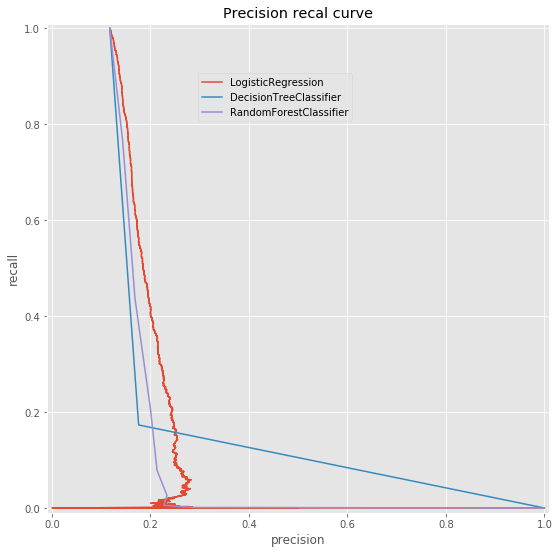

In [63]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(9, 9))

for k, v in result1.items():
    precision, recall, thresholds = precision_recall_curve(v["y_test"], v["predict_proba"][:, 1])
    plt.plot(precision, recall, label=k.__name__)


plt.title('Precision recal curve')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=(0.3, 0.8))

LogisticRegression показывает более приемлемые результаты, чем остальные два. При большей точности дает больший recall, если поиграть с  threshold


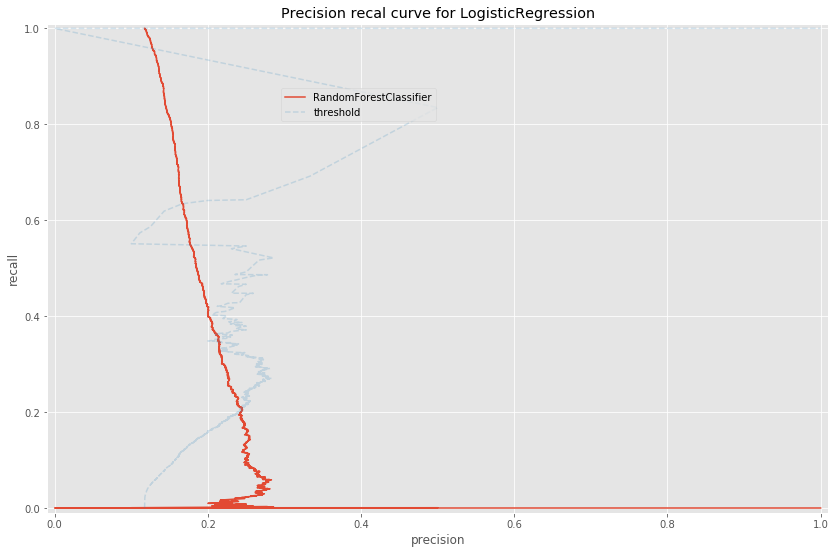

In [64]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(14, 9))


precision, recall, thresholds = precision_recall_curve(result1[LogisticRegression]["y_test"],
                                                       result1[LogisticRegression]["predict_proba"][:, 1])


plt.plot(precision, recall, label=k.__name__)
plt.plot(precision, np.append(thresholds, thresholds[-1]), linestyle="--", label="threshold", alpha=0.2)

plt.title('Precision recal curve for LogisticRegression')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=(0.3, 0.8))

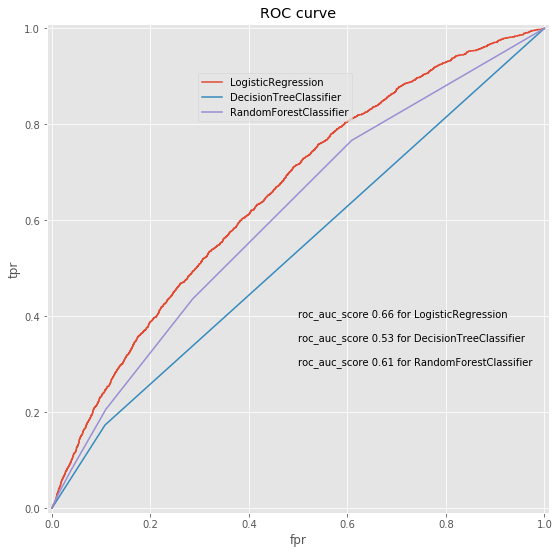

In [65]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(9, 9))
pos_y_text = 0.4
for k, v in result1.items():
    fpr, tpr, thresholds = roc_curve(v["y_test"], v["predict_proba"][:, 1])
    plt.plot(fpr, tpr, label=k.__name__)    
    plt.text(0.5, pos_y_text,  "roc_auc_score {0:.2f} for {1}".format(roc_auc_score(v["y_test"], v["predict_proba"][:, 1]), k.__name__))
    pos_y_text -= 0.05
    
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=(0.3, 0.8))

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
cross_val_results = dict()
models = {DecisionTreeClassifier, RandomForestClassifier, LogisticRegression}
for model in models:
    scores = cross_val_score(
            model(),
            pd.concat([x_train, x_test]),
            pd.concat([y_train, y_test]),
            scoring='roc_auc',
            cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123))
    
    cross_val_results[model] = {
        "scores": scores,
        "variance": np.var(scores),
        "std": np.std(scores),
        "mean": np.mean(scores)
    }

cross_val_results

{sklearn.linear_model.logistic.LogisticRegression: {'scores': array([0.59321471, 0.62230101, 0.61966377, 0.64544895, 0.62707688,
         0.61181192, 0.61645516, 0.62642564, 0.67706461, 0.61340301]),
  'variance': 0.0004561902566582657,
  'std': 0.021358610831659106,
  'mean': 0.6252865651760399},
 sklearn.tree.tree.DecisionTreeClassifier: {'scores': array([0.52486232, 0.51675085, 0.5206181 , 0.55264607, 0.54514627,
         0.52386319, 0.52884314, 0.5409053 , 0.52389068, 0.55451415]),
  'variance': 0.00017257452868877778,
  'std': 0.01313676248886223,
  'mean': 0.5332040082778371},
 sklearn.ensemble.forest.RandomForestClassifier: {'scores': array([0.61413459, 0.58805976, 0.61774812, 0.59410852, 0.60363974,
         0.58622232, 0.61691451, 0.59200363, 0.59803815, 0.61486988]),
  'variance': 0.00014038872774437423,
  'std': 0.011848574924621704,
  'mean': 0.6025739221335116}}

In [67]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

result = train_models(models={LogisticRegression}, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
result[LogisticRegression]["predict_proba"]
## Your Code Here

LogisticRegression:
    accuracy score: 0.88
    precision score: 0.20
    recall score: 0.00


array([[0.94205151, 0.05794849],
       [0.74064507, 0.25935493],
       [0.9630589 , 0.0369411 ],
       ...,
       [0.88482714, 0.11517286],
       [0.91930634, 0.08069366],
       [0.80035347, 0.19964653]])

In [68]:
# Померить roc_auc на тесте
roc_auc_score(y_test, result[LogisticRegression]["predict_proba"][:, 1])

0.6116641180493722

In [71]:
#попробывать полиноминальную регрессию и validation_curve
x_test.shape


(9040, 821)

roc auc score 0.5300734536391305


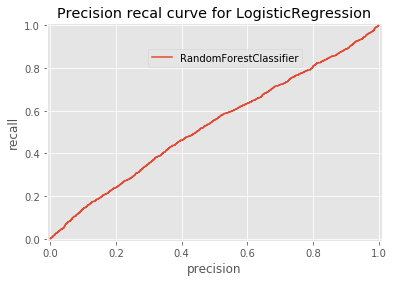

In [82]:
#попробывать перцептрон

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(2500, 500))
nn.fit(x_train, y_train)
predict = nn.predict_proba(x_test)

frp, trp, thresholds = roc_curve(y_test, predict[:, 1])

plt.plot(frp, trp, label=k.__name__)


plt.title('Precision recal curve for LogisticRegression')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=(0.3, 0.8))

print("roc auc score", roc_auc_score(y_test, predict[:, 1]))


